In [2]:
from sklearn.linear_model import LinearRegression,RidgeCV ,LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  mean_absolute_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from collections import defaultdict


In [107]:
data_test = pd.read_pickle('data_test.pkl')
data_train = pd.read_pickle('data_train.pkl')

In [4]:
def get_metrics (act,pred):
    return r2_score(act,pred),RMSE(act,pred),mean_absolute_error(act,pred)


def RMSE (act,pred):
    return np.sqrt(np.mean((act-pred)**2))

seed = 111

In [5]:
def treat_features_logy (df):
    columns_to_keep = ['town','flat_type','storey','floor_area_sqm','Remaining_lease_years','num_schools',"school_rank_nearby","flat_model"]
    y = pd.Series(df['resale_price'].apply(lambda x: np.log(x)))
    x = pd.DataFrame(df[columns_to_keep])
    categorical_features = ['town','flat_type','school_rank_nearby','flat_model']
    X = pd.get_dummies(x,columns = categorical_features,drop_first = True)
    return X,y

In [61]:
def treat_features (df):
    columns_to_keep = ['town','storey','flat_type','floor_area_sqm','Remaining_lease_years','num_schools',"school_rank_nearby","flat_model"]
    y = df['resale_price']
    x = pd.DataFrame(df[columns_to_keep])
    categorical_features = ['town','school_rank_nearby','flat_model','flat_type']
    X = pd.get_dummies(x,columns = categorical_features,drop_first = True)
    return X,y

In [6]:
def diagnostic_plot(y_true,y_pred):
    plt.figure(figsize=(15,6))
    
    plt.subplot(1, 2, 1)
    res = y_true - y_pred
    plt.scatter(y_pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 2, 2)
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")

## Model performance

In [108]:
X_train,y_train = treat_features_logy(data_train)
X_test,y_test =treat_features_logy(data_test)

In [109]:
X_train.num_schools.unique()

array([11.,  8.,  4., 10.,  6.,  9.,  7.,  5., 12.,  3.,  2., 14., 13.,
       15., 16.,  1., 18., 17., 19., 20.])

In [110]:
X = sm.add_constant(X_train)
X_pred = sm.add_constant(X_test)
model = sm.OLS(y_train,X)

model = model.fit()
model.summary()

C:\Users\Zhiqing\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           resale_price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     8815.
Date:                Mon, 03 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:14:36   Log-Likelihood:                 40084.
No. Observations:               50528   AIC:                        -8.008e+04
Df Residuals:                   50482   BIC:                        -7.967e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     11.1833      0.009   1226.729      0.000      11.165      11.201
storey                                     0.0084   9.51e-05     88.700      0.000       0.008       0.009
floor_area_sqm                             0.0083   8.64e-05     96.158      0.000       0.008       0.008
Remaining_lease_years                      0.0099   7.45e-05    132.725      0.000       0.010       0.010
num_schools                                0.0046      0.000     17.861      0.000       0.004       0.005
town_BEDOK                                 0.0012      0.003      0.353      0.724      -0.005       0.008
town_BISHAN                                0.1787      0.004     41.112      0.000       0.170       0.187
town_BUKIT BATOK                          -0.1689      0.004    -45.293      0.000      -0.176      -0.162
town_BUKIT MERAH                           0.2206      0.004     62.162      0.000       0.214       0.228
town_BUKIT PANJANG                        -0.2542      0.004    -60.816      0.000      -0.262      -0.246
town_BUKIT TIMAH                           0.3761      0.009     40.528      0.000       0.358       0.394
town_CENTRAL AREA                          0.3142      0.007     43.841      0.000       0.300       0.328
town_CHOA CHU KANG                        -0.3390      0.004    -84.308      0.000      -0.347      -0.331
town_CLEMENTI                              0.1095      0.004     26.799      0.000       0.101       0.117
town_GEYLANG                               0.0879      0.004     21.371      0.000       0.080       0.096
town_HOUGANG                              -0.1692      0.003    -48.602      0.000      -0.176      -0.162
town_JURONG EAST                          -0.1077      0.004    -25.685      0.000      -0.116      -0.100
town_JURONG WEST                          -0.2689      0.003    -84.976      0.000      -0.275      -0.263
town_KALLANG/WHAMPOA                       0.1292      0.004     32.745      0.000       0.122       0.137
town_MARINE PARADE                         0.3653      0.007     53.092      0.000       0.352       0.379
town_PASIR RIS                            -0.1929      0.004    -48.643      0.000      -0.201      -0.185
town_PUNGGOL                              -0.2676      0.005    -53.219      0.000      -0.277      -0.258
town_QUEENSTOWN                            0.2566      0.004     62.008      0.000       0.248       0.265
town_SEMBAWANG                            -0.3843      0.004    -95.087      0.000      -0.392      -0.376
town_SENGKANG                             -0.3018      0.004    -72.061      0.000      -0.310      -0.294
town_SERANGOON                             0.0005      0.004      0.109      0.913     

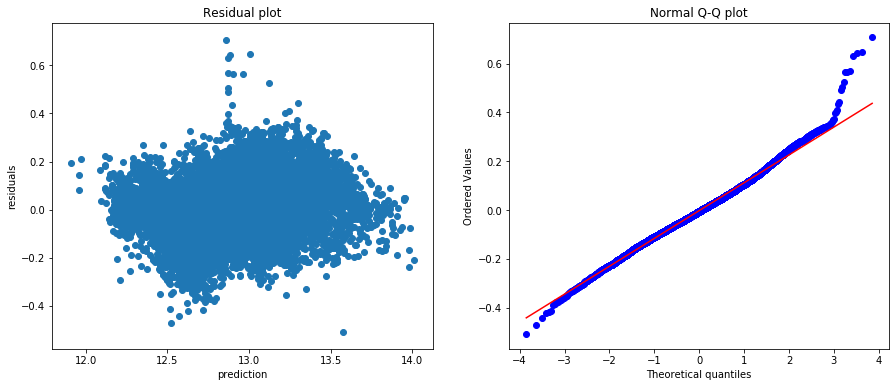

In [111]:
y_pred = model.predict(X_pred)
diagnostic_plot(y_test,y_pred)
plt.savefig("res_ylog_test.png")

In [112]:
lr_r2,lr_RMSE,lr_MAE = get_metrics(y_test,y_pred)

print('The R2 score is {:.3f} ,RMSE is {:.3f}, MAE is {:.3f}'.format(lr_r2,lr_RMSE,lr_MAE))

The R2 score is 0.885 ,RMSE is 0.114, MAE is 0.089


The errors of the final model is quite close to those of the validation's:
    The R2 score is 0.888 ,RMSE is 0.110, MAE is 0.086


Find below the final equation
# $y=e^{\beta_0 + \beta_1 X_{storey} + \beta_2 X_{floor area} + ...}$

In [113]:
ziplist = list(zip(y_test.index,y_test,y_pred))
results = pd.DataFrame(ziplist,columns = ['index','y_test','y_pred']).set_index('index')

In [114]:
results['residual'] = results['y_test'] - results['y_pred']

In [115]:
results

,y_test,y_pred,residual
index,,,
50528,12.180755,12.330351,-0.149596
50529,12.535376,12.604902,-0.069526
50530,12.676076,12.654704,0.021372
50531,12.563747,12.640225,-0.076478
50532,12.542545,12.597290,-0.054745
...,...,...,...
62405,13.034624,12.961568,0.073056
62406,13.244581,13.183508,0.061073
62407,13.195614,13.242554,-0.046940


In [116]:
results_sorted = results.sort_values(by="residual")

In [15]:
best_value = pd.DataFrame(data_test.loc[results_sorted.index[:10]])

In [16]:
worst_value = pd.DataFrame(data_test.loc[results_sorted.index[-10:]])

In [17]:
results_sorted['y_test_transformed'] = results_sorted.y_test.apply(lambda x: np.e**(x))
results_sorted['y_pred_transformed'] = results_sorted.y_pred.apply(lambda x: np.e**(x))

In [18]:
results_sorted['Res_absolute'] = results_sorted['y_test_transformed'] -results_sorted['y_pred_transformed']

In [19]:
results_sorted.tail(20)

,y_test,y_pred,residual,y_test_transformed,y_pred_transformed,Res_absolute
index,,,,,,
61057,13.586097,13.228149,0.357948,795000.0,555791.741444,239208.258556
57348,13.217674,12.858371,0.359302,550000.0,383989.806920,166010.193080
51183,13.473020,13.104320,0.368700,710000.0,491059.429238,218940.570762
52768,13.244581,12.873591,0.370990,565000.0,389878.605048,175121.394952
56518,13.664688,13.292218,0.372469,860000.0,592566.488039,267433.511961
54827,13.270783,12.872767,0.398016,580000.0,389557.644810,190442.355190
55081,13.624350,13.222171,0.402179,826000.0,552479.238280,273520.761720
50893,13.652992,13.244177,0.408815,850000.0,564771.777512,285228.222488
58613,13.331002,12.896427,0.434576,616000.0,398884.259680,217115.740320


In [20]:
results_sorted.head(20)

,y_test,y_pred,residual,y_test_transformed,y_pred_transformed,Res_absolute
index,,,,,,
56658,13.066851,13.575164,-0.508313,473000.0,786355.125472,-313355.125472
55108,12.055250,12.525614,-0.470364,172000.0,275299.206803,-103299.206803
55411,12.128111,12.569676,-0.441565,185000.0,287700.594387,-102700.594387
53701,12.200497,12.623085,-0.422588,198888.0,303484.338961,-104596.338961
52753,12.301383,12.717408,-0.416025,220000.0,333503.149228,-113503.149228
56039,12.100712,12.515018,-0.414306,180000.0,272397.542662,-92397.542662
51100,12.230765,12.618992,-0.388226,205000.0,302244.489187,-97244.489187
58913,12.345835,12.731059,-0.385225,230000.0,338087.321990,-108087.321990
54821,12.409013,12.787483,-0.378469,245000.0,357711.758646,-112711.758646


In [21]:
worst_value

,month,Year,Month,town,flat_type,storey,floor_area_sqm,flat_model,Remaining_lease_years,Postal_code,num_schools,school_rank_nearby,resale_price,storey_groups
index,,,,,,,,,,,,,,
50843,2019-06-01,2019,06,BUKIT MERAH,3 ROOM,2,88.0,Standard,52.583333,161034,7.0,0,638000.0,0_LowFlr
54817,2019-08-01,2019,08,BUKIT MERAH,3 ROOM,2,88.0,Standard,52.416667,161036,7.0,0,645000.0,0_LowFlr
53455,2019-07-01,2019,07,KALLANG/WHAMPOA,3 ROOM,2,108.0,Terrace/Multi-Gen/Adjoined,52.916667,320053,9.0,1,845000.0,0_LowFlr
51441,2019-06-01,2019,06,KALLANG/WHAMPOA,3 ROOM,2,90.0,Terrace/Multi-Gen/Adjoined,52.083333,320051,9.0,1,750000.0,0_LowFlr
61341,2019-11-01,2019,11,KALLANG/WHAMPOA,3 ROOM,2,83.0,Terrace/Multi-Gen/Adjoined,51.666667,320039,9.0,1,705000.0,0_LowFlr
50845,2019-06-01,2019,06,BUKIT MERAH,3 ROOM,2,88.0,Standard,52.583333,161050,7.0,0,690000.0,0_LowFlr
51442,2019-06-01,2019,06,KALLANG/WHAMPOA,3 ROOM,2,79.0,Terrace/Multi-Gen/Adjoined,52.083333,320059,9.0,1,730000.0,0_LowFlr
61345,2019-11-01,2019,11,KALLANG/WHAMPOA,3 ROOM,2,81.0,Terrace/Multi-Gen/Adjoined,51.666667,320062,9.0,1,750000.0,0_LowFlr
57525,2019-09-01,2019,09,QUEENSTOWN,3 ROOM,2,87.0,Terrace/Multi-Gen/Adjoined,47.833333,142055,3.0,2,850000.0,0_LowFlr


In [22]:
best_value

,month,Year,Month,town,flat_type,storey,floor_area_sqm,flat_model,Remaining_lease_years,Postal_code,num_schools,school_rank_nearby,resale_price,storey_groups
index,,,,,,,,,,,,,,
56658,2019-09-01,2019,09,BISHAN,5 ROOM,11,136.0,Terrace/Multi-Gen/Adjoined,53.083333,570022,9.0,0,473000.0,1_MediumFlr
55108,2019-08-01,2019,08,GEYLANG,3 ROOM,11,60.0,Improved,49.500000,370085,5.0,0,172000.0,1_MediumFlr
55411,2019-08-01,2019,08,KALLANG/WHAMPOA,3 ROOM,11,56.0,Standard,50.416667,320028,9.0,1,185000.0,1_MediumFlr
53701,2019-07-01,2019,07,QUEENSTOWN,3 ROOM,2,60.0,Improved,50.666667,141169,4.0,2,198888.0,0_LowFlr
52753,2019-07-01,2019,07,BUKIT MERAH,3 ROOM,11,63.0,Standard,49.583333,160107,8.0,0,220000.0,1_MediumFlr
56039,2019-08-01,2019,08,TOA PAYOH,3 ROOM,2,67.0,Improved,49.416667,310126,8.0,0,180000.0,0_LowFlr
51100,2019-06-01,2019,06,GEYLANG,3 ROOM,2,66.0,Improved,61.583333,400021,5.0,0,205000.0,0_LowFlr
58913,2019-10-01,2019,10,CLEMENTI,3 ROOM,11,67.0,New Generation,60.000000,120714,4.0,1,230000.0,1_MediumFlr
54821,2019-08-01,2019,08,BUKIT MERAH,3 ROOM,14,65.0,Improved,55.333333,090013,6.0,0,245000.0,2_HighFlr


After observing these data, we realize those are really outliners and some other confounding factor may play an effect: e.g. People are more willing to pay a premium for terrace units depite it is old (<60 years remaining); old units sometimes have to sell at a discount v.s. market condition maybe due to its lack of maintainence which is not captured through these features

Hence we would like to explore another model with those outliners removed and see if a normal OLS model can fit or if we shall continue using the transformed target variable (less intuitive model)

In [23]:
original_data = pd.read_pickle('df_final_cleaned.pkl')

In [24]:
original_data.loc[results_sorted.index[-20:]]

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,school_rank_nearby,Year,Month,low,high,storey,Remaining_years_y,Remaining_months,Remaining_years,Remaining_lease_years
index,,,,,,,,,,,,,,,,,,,,,
61057,2019-11,GEYLANG,4 ROOM,3,PINE CL,16 TO 18,95.0,Model A,2000,79 years 07 months,...,0,2019,11,16,18,17,79,7,79,79.583333
57348,2019-09,KALLANG/WHAMPOA,4 ROOM,69,MOULMEIN RD,07 TO 09,84.0,Improved,1972,51 years 10 months,...,0,2019,09,7,9,8,51,10,51,51.833333
51183,2019-06,HOUGANG,5 ROOM,122,HOUGANG AVE 1,01 TO 03,133.0,Improved-Maisonette,1983,63 years 03 months,...,0,2019,06,1,3,2,63,3,63,63.250000
52768,2019-07,BUKIT MERAH,3 ROOM,24,TIONG BAHRU RD,01 TO 03,88.0,Standard,1973,52 years 06 months,...,0,2019,07,1,3,2,52,6,52,52.500000
56518,2019-09,ANG MO KIO,5 ROOM,700C,ANG MO KIO AVE 6,10 TO 12,111.0,Improved,2003,82 years 09 months,...,0,2019,09,10,12,11,82,9,82,82.750000
54827,2019-08,BUKIT MERAH,3 ROOM,18,TIONG BAHRU RD,01 TO 03,88.0,Standard,1973,52 years 05 months,...,0,2019,08,1,3,2,52,5,52,52.416667
55081,2019-08,CLEMENTI,4 ROOM,441B,CLEMENTI AVE 3,07 TO 09,87.0,Model A,2012,91 years 11 months,...,1,2019,08,7,9,8,91,11,91,91.916667
50893,2019-06,BUKIT MERAH,5 ROOM,87,ZION RD,07 TO 09,117.0,Improved,1974,54 years,...,0,2019,06,7,9,8,54,0,54,54.000000
58613,2019-10,BUKIT MERAH,3 ROOM,34,KIM CHENG ST,04 TO 06,88.0,Standard,1973,52 years 03 months,...,0,2019,10,4,6,5,52,3,52,52.250000


In [117]:
test_to_drop = list(results_sorted.index[-100:])

In [118]:
y_train_h = model.predict(X)

In [119]:
ziplist2 = list(zip(y_train.index,y_train,y_train_h))
Y_train_res = pd.DataFrame(ziplist2,columns = ['index','y_train','y_train_hat']).set_index('index')

In [120]:
Y_train_res

,y_train,y_train_hat
index,,
0,12.354493,12.298434
1,12.429216,12.581251
2,12.476100,12.580976
3,12.487485,12.638892
4,12.487485,12.580976
...,...,...
50523,13.199324,13.217584
50524,13.226723,13.248318
50525,13.138237,13.163707


In [121]:
Y_train_res['residual'] = Y_train_res['y_train'] - Y_train_res['y_train_hat']

In [122]:
Y_train_sorted = Y_train_res.sort_values(by="residual")

In [123]:
train_to_drop = list(Y_train_sorted[-500:].index)

In [124]:
data_test_drop = data_test.drop(test_to_drop)

In [125]:
data_train_drop = data_train.drop(train_to_drop)

## Re-train the models with right tail outliners removed

We realize from above that some of the transactions are outliners where market condition, housing condition and other variables are affecting the prediction analysis. We will try to discard those data points to remove some noise for the model.

As a start point, we will remove 1% of the most right skewed data points for both the test set and train set

In [314]:
X,y = treat_features(data_train_drop)
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.25,random_state = seed)

In [315]:
X = sm.add_constant(X_train)
X_pred = sm.add_constant(X_val)
model = sm.OLS(y_train,X)

model = model.fit()
model.summary()

C:\Users\Zhiqing\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           resale_price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     5881.
Date:                Mon, 03 Feb 2020   Prob (F-statistic):               0.00
Time:                        21:20:33   Log-Likelihood:            -4.6192e+05
No. Observations:               37521   AIC:                         9.239e+05
Df Residuals:                   37475   BIC:                         9.243e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                  -3.105e+05   5199.590    -59.710      0.000   -3.21e+05      -3e+05
storey                                  4663.9818     54.140     86.147      0.000    4557.867    4770.097
floor_area_sqm                          3715.7387     48.910     75.971      0.000    3619.874    3811.603
Remaining_lease_years                   4556.1692     42.579    107.006      0.000    4472.714    4639.625
num_schools                             2411.5763    146.346     16.479      0.000    2124.735    2698.418
town_BEDOK                             -4794.3100   1905.262     -2.516      0.012   -8528.676   -1059.944
town_BISHAN                             1.004e+05   2496.299     40.226      0.000    9.55e+04    1.05e+05
town_BUKIT BATOK                       -7.746e+04   2128.565    -36.392      0.000   -8.16e+04   -7.33e+04
town_BUKIT MERAH                        1.132e+05   2037.812     55.546      0.000    1.09e+05    1.17e+05
town_BUKIT PANJANG                     -1.324e+05   2392.062    -55.346      0.000   -1.37e+05   -1.28e+05
town_BUKIT TIMAH                        2.141e+05   5214.911     41.055      0.000    2.04e+05    2.24e+05
town_CENTRAL AREA                       1.242e+05   4064.160     30.568      0.000    1.16e+05    1.32e+05
town_CHOA CHU KANG                     -1.605e+05   2292.575    -70.022      0.000   -1.65e+05   -1.56e+05
town_CLEMENTI                           5.199e+04   2336.963     22.248      0.000    4.74e+04    5.66e+04
town_GEYLANG                            4.426e+04   2384.668     18.561      0.000    3.96e+04    4.89e+04
town_HOUGANG                           -8.622e+04   1984.969    -43.435      0.000   -9.01e+04   -8.23e+04
town_JURONG EAST                       -5.346e+04   2391.506    -22.354      0.000   -5.81e+04   -4.88e+04
town_JURONG WEST                       -1.271e+05   1811.834    -70.150      0.000   -1.31e+05   -1.24e+05
town_KALLANG/WHAMPOA                    5.851e+04   2274.182     25.727      0.000    5.41e+04     6.3e+04
town_MARINE PARADE                       1.67e+05   3938.302     42.392      0.000    1.59e+05    1.75e+05
town_PASIR RIS                         -9.821e+04   2248.306    -43.684      0.000   -1.03e+05   -9.38e+04
town_PUNGGOL                           -1.472e+05   2859.074    -51.502      0.000   -1.53e+05   -1.42e+05
town_QUEENSTOWN                         1.313e+05   2349.644     55.868      0.000    1.27e+05    1.36e+05
town_SEMBAWANG                         -1.822e+05   2301.046    -79.170      0.000   -1.87e+05   -1.78e+05
town_SENGKANG                          -1.594e+05   2392.286    -66.649      0.000   -1.64e+05   -1.55e+05
town_SERANGOON                         -9900.0173   2425.183     -4.082      0.000   -1

The R2 score is 0.878 ,RMSE is 53349.499, MAE is 41345.016


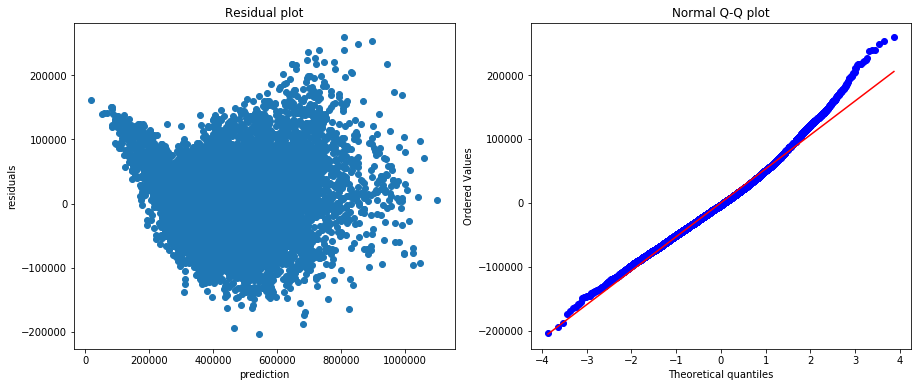

In [316]:
y_pred = model.predict(X_pred)

diagnostic_plot(y_val,y_pred)

lr_r2,lr_RMSE,lr_MAE = get_metrics(y_val,y_pred)

print('The R2 score is {:.3f} ,RMSE is {:.3f}, MAE is {:.3f}'.format(lr_r2,lr_RMSE,lr_MAE))

Removing outliners do help to improve to modelling though the normal assumption is not strongly met > residual still displaying a kind of pattern and the QQ plot still shows a curvy line

In [129]:
X,y = treat_features_logy(data_train_drop)
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.25,random_state = seed)

In [130]:
X = sm.add_constant(X_train)
X_pred = sm.add_constant(X_val)
model = sm.OLS(y_train,X)

model = model.fit()
model.summary()

C:\Users\Zhiqing\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           resale_price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     7150.
Date:                Mon, 03 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:16:59   Log-Likelihood:                 31527.
No. Observations:               37521   AIC:                        -6.296e+04
Df Residuals:                   37475   BIC:                        -6.257e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     11.1947      0.010   1108.023      0.000      11.175      11.214
storey                                     0.0086      0.000     81.962      0.000       0.008       0.009
floor_area_sqm                             0.0080    9.5e-05     84.463      0.000       0.008       0.008
Remaining_lease_years                      0.0098   8.27e-05    118.929      0.000       0.010       0.010
num_schools                                0.0050      0.000     17.452      0.000       0.004       0.006
town_BEDOK                             -8.308e-06      0.004     -0.002      0.998      -0.007       0.007
town_BISHAN                                0.1814      0.005     37.393      0.000       0.172       0.191
town_BUKIT BATOK                          -0.1670      0.004    -40.385      0.000      -0.175      -0.159
town_BUKIT MERAH                           0.2206      0.004     55.723      0.000       0.213       0.228
town_BUKIT PANJANG                        -0.2534      0.005    -54.513      0.000      -0.262      -0.244
town_BUKIT TIMAH                           0.3824      0.010     37.739      0.000       0.363       0.402
town_CENTRAL AREA                          0.3262      0.008     41.303      0.000       0.311       0.342
town_CHOA CHU KANG                        -0.3311      0.004    -74.334      0.000      -0.340      -0.322
town_CLEMENTI                              0.1128      0.005     24.841      0.000       0.104       0.122
town_GEYLANG                               0.0860      0.005     18.553      0.000       0.077       0.095
town_HOUGANG                              -0.1704      0.004    -44.167      0.000      -0.178      -0.163
town_JURONG EAST                          -0.1043      0.005    -22.443      0.000      -0.113      -0.095
town_JURONG WEST                          -0.2664      0.004    -75.665      0.000      -0.273      -0.259
town_KALLANG/WHAMPOA                       0.1281      0.004     28.986      0.000       0.119       0.137
town_MARINE PARADE                         0.3761      0.008     49.147      0.000       0.361       0.391
town_PASIR RIS                            -0.1837      0.004    -42.051      0.000      -0.192      -0.175
town_PUNGGOL                              -0.2650      0.006    -47.703      0.000      -0.276      -0.254
town_QUEENSTOWN                            0.2632      0.005     57.647      0.000       0.254       0.272
town_SEMBAWANG                            -0.3760      0.004    -84.099      0.000      -0.385      -0.367
town_SENGKANG                             -0.3012      0.005    -64.801      0.000      -0.310      -0.292
town_SERANGOON                            -0.0138      0.005     -2.929      0.003     

The R2 score is 0.897 ,RMSE is 0.104, MAE is 0.083


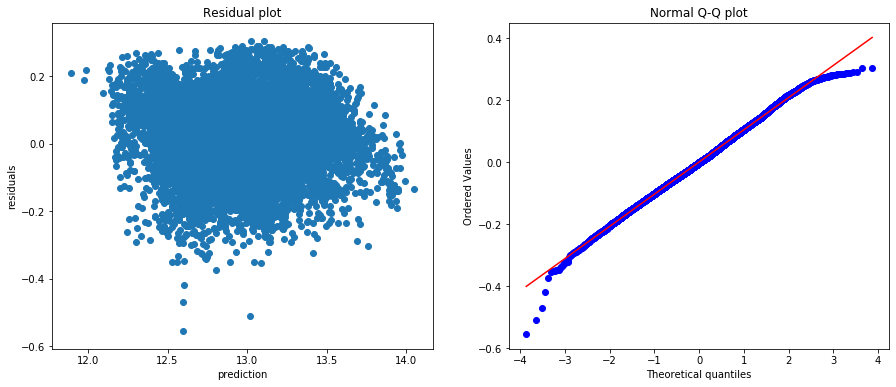

In [131]:
y_pred = model.predict(X_pred)

diagnostic_plot(y_val,y_pred)

lr_r2,lr_RMSE,lr_MAE = get_metrics(y_val,y_pred)

print('The R2 score is {:.3f} ,RMSE is {:.3f}, MAE is {:.3f}'.format(lr_r2,lr_RMSE,lr_MAE))

We will take the model above as my final model > log transformed target variable and also with outliner treatment

In [132]:
X_train,y_train = treat_features_logy(data_train_drop)
X_test,y_test =treat_features_logy(data_test_drop)

In [133]:
X = sm.add_constant(X_train)
X_pred = sm.add_constant(X_test)
model = sm.OLS(y_train,X)

model = model.fit()
model.summary()

C:\Users\Zhiqing\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           resale_price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     9583.
Date:                Mon, 03 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:17:19   Log-Likelihood:                 42100.
No. Observations:               50028   AIC:                        -8.411e+04
Df Residuals:                   49982   BIC:                        -8.370e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     11.1864      0.009   1276.264      0.000      11.169      11.204
storey                                     0.0086    9.1e-05     94.962      0.000       0.008       0.009
floor_area_sqm                             0.0081   8.33e-05     97.614      0.000       0.008       0.008
Remaining_lease_years                      0.0099   7.15e-05    138.102      0.000       0.010       0.010
num_schools                                0.0050      0.000     20.150      0.000       0.004       0.005
town_BEDOK                                -0.0007      0.003     -0.232      0.816      -0.007       0.006
town_BISHAN                                0.1837      0.004     44.232      0.000       0.176       0.192
town_BUKIT BATOK                          -0.1651      0.004    -46.276      0.000      -0.172      -0.158
town_BUKIT MERAH                           0.2187      0.003     64.187      0.000       0.212       0.225
town_BUKIT PANJANG                        -0.2552      0.004    -63.597      0.000      -0.263      -0.247
town_BUKIT TIMAH                           0.3861      0.009     43.630      0.000       0.369       0.403
town_CENTRAL AREA                          0.3141      0.007     45.493      0.000       0.301       0.328
town_CHOA CHU KANG                        -0.3312      0.004    -86.096      0.000      -0.339      -0.324
town_CLEMENTI                              0.1098      0.004     28.033      0.000       0.102       0.117
town_GEYLANG                               0.0806      0.004     20.223      0.000       0.073       0.088
town_HOUGANG                              -0.1715      0.003    -51.284      0.000      -0.178      -0.165
town_JURONG EAST                          -0.1039      0.004    -25.899      0.000      -0.112      -0.096
town_JURONG WEST                          -0.2658      0.003    -87.575      0.000      -0.272      -0.260
town_KALLANG/WHAMPOA                       0.1278      0.004     33.740      0.000       0.120       0.135
town_MARINE PARADE                         0.3751      0.007     57.141      0.000       0.362       0.388
town_PASIR RIS                            -0.1856      0.004    -48.945      0.000      -0.193      -0.178
town_PUNGGOL                              -0.2667      0.005    -55.420      0.000      -0.276      -0.257
town_QUEENSTOWN                            0.2600      0.004     65.571      0.000       0.252       0.268
town_SEMBAWANG                            -0.3786      0.004    -97.928      0.000      -0.386      -0.371
town_SENGKANG                             -0.3038      0.004    -75.760      0.000      -0.312      -0.296
town_SERANGOON                            -0.0133      0.004     -3.258      0.001     

The R2 score is 0.893 ,RMSE is 0.110, MAE is 0.086


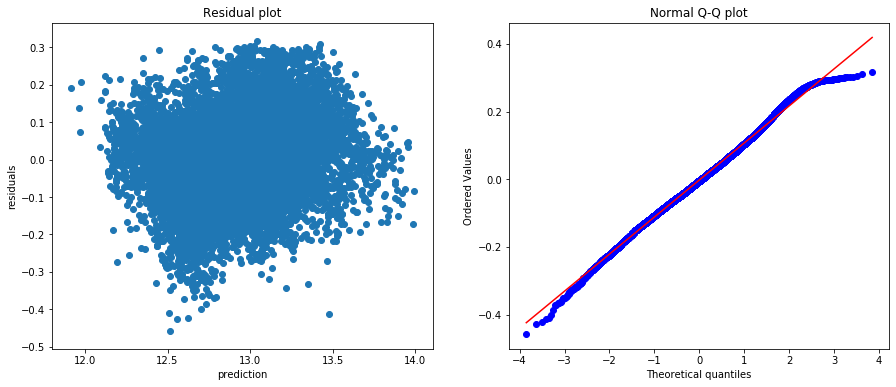

In [134]:
y_pred = model.predict(X_pred)
diagnostic_plot(y_test,y_pred)
plt.savefig("res_ylog_test.png")
lr_r2,lr_RMSE,lr_MAE = get_metrics(y_test,y_pred)

print('The R2 score is {:.3f} ,RMSE is {:.3f}, MAE is {:.3f}'.format(lr_r2,lr_RMSE,lr_MAE))

## Prepare data to export and for further analysis

In [228]:
coef = model.params

In [266]:
ziplists = list(zip(coef.index,coef))
Coef = pd.DataFrame(ziplists,columns = ['co_name','Coefficient'])

In [236]:
Coef

,name,Coefficient
0,const,11.186359
1,storey,0.008644
2,floor_area_sqm,0.008128
3,Remaining_lease_years,0.009872
4,num_schools,0.004965
5,town_BEDOK,-0.000741
6,town_BISHAN,0.183745
7,town_BUKIT BATOK,-0.165106
8,town_BUKIT MERAH,0.218673
9,town_BUKIT PANJANG,-0.255217


In [276]:
coef_name_dict = defaultdict()

In [277]:
for key in Coef.co_name[5:30]:
    coef_name_dict[key] = key.split('town_')[1].lower().capitalize()

In [278]:
for key in Coef.co_name[30:34]:
    coef_name_dict[key] = key.split('flat_type_')[1].lower()

In [279]:
School_value = ['Execellent',"Good","Developing"]

In [280]:
for key,sch in zip(Coef.co_name[34:37],School_value):
    coef_name_dict[key] = sch+" school"

In [281]:
for key in Coef.co_name[37:45]:
    coef_name_dict[key] = key.split('flat_model_')[1]

In [282]:
coef_name_dict

defaultdict(None,
            {'town_BEDOK': 'Bedok',
             'town_BISHAN': 'Bishan',
             'town_BUKIT BATOK': 'Bukit batok',
             'town_BUKIT MERAH': 'Bukit merah',
             'town_BUKIT PANJANG': 'Bukit panjang',
             'town_BUKIT TIMAH': 'Bukit timah',
             'town_CENTRAL AREA': 'Central area',
             'town_CHOA CHU KANG': 'Choa chu kang',
             'town_CLEMENTI': 'Clementi',
             'town_GEYLANG': 'Geylang',
             'town_HOUGANG': 'Hougang',
             'town_JURONG EAST': 'Jurong east',
             'town_JURONG WEST': 'Jurong west',
             'town_KALLANG/WHAMPOA': 'Kallang/whampoa',
             'town_MARINE PARADE': 'Marine parade',
             'town_PASIR RIS': 'Pasir ris',
             'town_PUNGGOL': 'Punggol',
             'town_QUEENSTOWN': 'Queenstown',
             'town_SEMBAWANG': 'Sembawang',
             'town_SENGKANG': 'Sengkang',
             'town_SERANGOON': 'Serangoon',
             'town_TAMPI

In [283]:
Coef['co_name'].replace(coef_name_dict,inplace=True)

In [285]:
Coef['Coef_transformed'] = np.e ** Coef['Coefficient']

In [287]:
Coef.to_csv("Coef_convert.csv")

In [288]:
Coef_town = pd.DataFrame(Coef[5:30])

In [290]:
Coef_town['Perct Premium'] = Coef_town.Coef_transformed - 1

In [292]:
Coef_town.head()

,co_name,Coefficient,Coef_transformed,Perct Premium
5,Bedok,-0.000741,0.999259,-0.000741
6,Bishan,0.183745,1.201709,0.201709
7,Bukit batok,-0.165106,0.847804,-0.152196
8,Bukit merah,0.218673,1.244425,0.244425
9,Bukit panjang,-0.255217,0.774749,-0.225251


In [306]:
columns = dict(enumerate(list(Coef_town.columns)))

In [307]:
AMK = pd.DataFrame(['Ang Mo Kio',0,0,0]).transpose().rename(columns = columns)

In [309]:
Coef_town = pd.concat([Coef_town,AMK])

<BarContainer object of 26 artists>

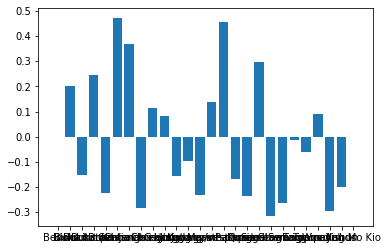

In [313]:
plt.bar(Coef_town.co_name,Coef_town['Perct Premium'])

In [135]:
ziplist = list(zip(y_test.index,y_test,y_pred))
y_test_results = pd.DataFrame(ziplist,columns = ['index','y_test','y_pred']).set_index('index')

In [82]:
y_test_results

,y_test,y_pred
index,,
50528,12.180755,12.329258
50529,12.535376,12.603504
50530,12.676076,12.654510
50531,12.563747,12.639718
50532,12.542545,12.597522
...,...,...
62405,13.034624,12.961469
62406,13.244581,13.186212
62407,13.195614,13.240791


In [136]:
y_test_results['Prediction_transformed'] = np.e **y_test_results['y_pred']

In [137]:
data_w_prediction = data_test.merge(y_test_results,left_index= True,right_index=True)

In [138]:
data_w_prediction.to_pickle('data_w_prediction.pkl')

In [139]:
data_w_prediction['Act_price_per_sqm'] = data_w_prediction['resale_price'] / data_w_prediction['floor_area_sqm']

In [140]:
data_w_prediction['Pred_price_per_sqm'] = data_w_prediction['Prediction_transformed']/ data_w_prediction['floor_area_sqm']

In [141]:
data_w_prediction

,month,Year,Month,town,flat_type,storey,floor_area_sqm,flat_model,Remaining_lease_years,Postal_code,num_schools,school_rank_nearby,resale_price,storey_groups,y_test,y_pred,Prediction_transformed,Act_price_per_sqm,Pred_price_per_sqm
50528,2019-06-01,2019,06,ANG MO KIO,1 / 2 ROOM,11,45.0,Improved,65.583333,561172,7.0,0.0,195000.0,1_MediumFlr,12.180755,12.329369,226244.020400,4333.333333,5027.644898
50529,2019-06-01,2019,06,ANG MO KIO,3 ROOM,2,73.0,New Generation,57.000000,560320,10.0,0.0,278000.0,0_LowFlr,12.535376,12.603465,297587.932372,3808.219178,4076.547019
50530,2019-06-01,2019,06,ANG MO KIO,3 ROOM,8,73.0,New Generation,56.916667,560319,10.0,0.0,320000.0,1_MediumFlr,12.676076,12.654505,313171.090829,4383.561644,4290.014943
50531,2019-06-01,2019,06,ANG MO KIO,3 ROOM,8,73.0,New Generation,55.916667,560215,9.0,0.0,286000.0,1_MediumFlr,12.563747,12.639668,308558.943908,3917.808219,4226.834848
50532,2019-06-01,2019,06,ANG MO KIO,3 ROOM,8,67.0,New Generation,57.083333,560219,8.0,0.0,280000.0,1_MediumFlr,12.542545,12.597452,295803.878956,4179.104478,4414.983268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62405,2019-11-01,2019,11,YISHUN,5 ROOM,8,122.0,Improved,67.416667,760865,6.0,2.0,458000.0,1_MediumFlr,13.034624,12.962011,425921.960781,3754.098361,3491.163613
62406,2019-11-01,2019,11,YISHUN,EXECUTIVE & MULTI-GENERATION,8,142.0,Apartment,67.666667,760328,10.0,1.0,565000.0,1_MediumFlr,13.244581,13.186267,532994.745122,3978.873239,3753.484121
62407,2019-11-01,2019,11,YISHUN,EXECUTIVE & MULTI-GENERATION,5,146.0,Maisonette,67.583333,760328,10.0,1.0,538000.0,0_LowFlr,13.195614,13.240882,562913.787617,3684.931507,3855.573888
62408,2019-11-01,2019,11,YISHUN,EXECUTIVE & MULTI-GENERATION,11,146.0,Maisonette,67.000000,760611,9.0,1.0,588888.0,1_MediumFlr,13.285991,13.282021,586554.410057,4033.479452,4017.495959


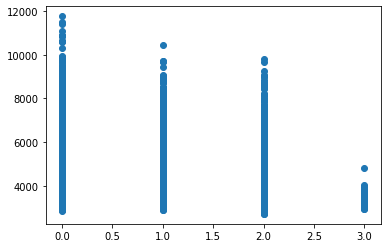

In [142]:
plt.scatter(data_w_prediction['school_rank_nearby'],data_w_prediction['Pred_price_per_sqm'])

In [143]:
data_w_prediction['Diff_price_sqm'] = data_w_prediction['Act_price_per_sqm'] - data_w_prediction['Pred_price_per_sqm'] 

In [144]:
data_w_prediction.sort_values(by='Diff_price_sqm')[:10]

,month,Year,Month,town,flat_type,storey,floor_area_sqm,flat_model,Remaining_lease_years,Postal_code,num_schools,school_rank_nearby,resale_price,storey_groups,y_test,y_pred,Prediction_transformed,Act_price_per_sqm,Pred_price_per_sqm,Diff_price_sqm
59546,2019-10-01,2019,10,QUEENSTOWN,3 ROOM,32,69.0,Model A,91.416667,132028,3.0,0.0,450000.0,2_HighFlr,13.017003,13.350317,628013.262826,6521.739130,9101.641490,-2579.902360
56658,2019-09-01,2019,09,BISHAN,5 ROOM,11,136.0,Terrace/Multi-Gen/Adjoined,53.083333,570022,9.0,0.0,473000.0,1_MediumFlr,13.066851,13.479877,714884.893614,3477.941176,5256.506571,-1778.565394
55411,2019-08-01,2019,08,KALLANG/WHAMPOA,3 ROOM,11,56.0,Standard,50.416667,320028,9.0,1.0,185000.0,1_MediumFlr,12.128111,12.555335,283604.195550,3303.571429,5064.360635,-1760.789206
53701,2019-07-01,2019,07,QUEENSTOWN,3 ROOM,2,60.0,Improved,50.666667,141169,4.0,2.0,198888.0,0_LowFlr,12.200497,12.623008,303460.953088,3314.800000,5057.682551,-1742.882551
52753,2019-07-01,2019,07,BUKIT MERAH,3 ROOM,11,63.0,Standard,49.583333,160107,8.0,0.0,220000.0,1_MediumFlr,12.301383,12.701234,328152.754194,3492.063492,5208.773876,-1716.710384
52764,2019-07-01,2019,07,BUKIT MERAH,3 ROOM,11,59.0,Improved,55.833333,090042,6.0,0.0,230000.0,1_MediumFlr,12.345835,12.709918,331014.514757,3898.305085,5610.415504,-1712.110420
54821,2019-08-01,2019,08,BUKIT MERAH,3 ROOM,14,65.0,Improved,55.333333,090013,6.0,0.0,245000.0,2_HighFlr,12.409013,12.779681,354931.799059,3769.230769,5460.489216,-1691.258447
55108,2019-08-01,2019,08,GEYLANG,3 ROOM,11,60.0,Improved,49.500000,370085,5.0,0.0,172000.0,1_MediumFlr,12.055250,12.512491,271710.037721,2866.666667,4528.500629,-1661.833962
60768,2019-11-01,2019,11,BUKIT MERAH,3 ROOM,5,67.0,New Generation,58.166667,160141,7.0,0.0,250000.0,0_LowFlr,12.429216,12.795923,360743.740710,3731.343284,5384.234936,-1652.891652
50854,2019-06-01,2019,06,BUKIT MERAH,3 ROOM,5,59.0,Improved,55.916667,090028,6.0,0.0,218000.0,0_LowFlr,12.292250,12.658878,314543.480916,3694.915254,5331.245439,-1636.330185


In [149]:
raw_data = pd.read_pickle('data_w_school.pkl')

In [152]:
df_pred = data_w_prediction.merge(raw_data['street_name'],left_index = True,right_index = True,how="left")

In [154]:
Group_by = df_pred.groupby('street_name').mean()

In [155]:
Group_by.columns

Index(['storey', 'floor_area_sqm', 'Remaining_lease_years', 'num_schools',
       'resale_price', 'y_test', 'y_pred', 'Prediction_transformed',
       'Act_price_per_sqm', 'Pred_price_per_sqm', 'Diff_price_sqm'],
      dtype='object')

In [157]:
Group_by['Premium over prediction'] = Group_by['resale_price'] - Group_by['Prediction_transformed']

In [198]:
sorted_df = Group_by.sort_values(by=['Diff_price_sqm'])

In [199]:
sorted_df[:20]

,storey,floor_area_sqm,Remaining_lease_years,num_schools,resale_price,y_test,y_pred,Prediction_transformed,Act_price_per_sqm,Pred_price_per_sqm,Diff_price_sqm,Premium over prediction
street_name,,,,,,,,,,,,
KLANG LANE,9.333333,89.444444,82.185185,6.444444,540111.111111,13.186725,13.373261,648785.268605,6021.948335,7251.938530,-1229.990195,-108674.157494
SIN MING RD,9.000000,81.166667,53.222222,7.166667,308000.000000,12.610937,12.862942,404628.311139,3855.506993,4955.029367,-1099.522374,-96628.311139
JLN KUKOH,11.000000,54.000000,54.388889,6.000000,240000.000000,12.387815,12.601158,297375.329057,4444.296212,5503.973209,-1059.676997,-57375.329057
CHANDER RD,11.000000,121.000000,64.333333,6.000000,575000.000000,13.262125,13.460908,701451.937445,4752.066116,5797.123450,-1045.057334,-126451.937445
TELOK BLANGAH WAY,6.800000,70.400000,55.583333,6.600000,296900.000000,12.580233,12.798399,363908.866390,4190.666155,5197.019701,-1006.353546,-67008.866390
C'WEALTH CRES,5.600000,59.133333,49.194444,4.533333,248266.666667,12.415810,12.623457,305300.877451,4214.436933,5180.146545,-965.709612,-57034.210785
CLEMENTI ST 12,5.000000,67.000000,64.166667,8.000000,282500.000000,12.551434,12.751196,344964.330106,4216.417910,5148.721345,-932.303434,-62464.330106
WEST COAST RD,8.300000,69.600000,60.041667,4.000000,279200.000000,12.530191,12.736903,341363.911262,3999.422244,4915.518211,-916.095968,-62163.911262
ROWELL RD,17.600000,112.600000,63.166667,7.000000,597400.000000,13.292405,13.446004,697702.790389,5298.219605,6179.617161,-881.397556,-100302.790389


In [200]:
columns_to_keep = ['Remaining_lease_years','resale_price','Prediction_transformed','Premium over prediction','Diff_price_sqm']
prediction = pd.DataFrame(sorted_df[columns_to_keep])

In [201]:
name_town = dict(zip(df_pred.street_name,df_pred.town))

In [202]:
prediction['town'] = list(prediction.index)

In [203]:
prediction.town.replace(name_town,inplace = True)

In [204]:
prediction.head()

,Remaining_lease_years,resale_price,Prediction_transformed,Premium over prediction,Diff_price_sqm,town
street_name,,,,,,
KLANG LANE,82.185185,540111.111111,648785.268605,-108674.157494,-1229.990195,CENTRAL AREA
SIN MING RD,53.222222,308000.000000,404628.311139,-96628.311139,-1099.522374,BISHAN
JLN KUKOH,54.388889,240000.000000,297375.329057,-57375.329057,-1059.676997,CENTRAL AREA
CHANDER RD,64.333333,575000.000000,701451.937445,-126451.937445,-1045.057334,CENTRAL AREA
TELOK BLANGAH WAY,55.583333,296900.000000,363908.866390,-67008.866390,-1006.353546,BUKIT MERAH


In [206]:
def Count (series):
    keys = series.unique()
    count_dict = dict.fromkeys(keys,0)

    for item in series:
        count_dict[item] += 1
    return count_dict

In [207]:
street_count = Count(df_pred.street_name)

In [208]:
prediction['Num_transaction'] = prediction.index

In [209]:
prediction.Num_transaction.replace(street_count,inplace =True)

In [210]:
prediction.to_csv('final_pred_wdiff.csv')

In [193]:
Top_schools_only= df_pred[df_pred['school_rank_nearby'] == 0]

In [194]:
Top_schools_only

,month,Year,Month,town,flat_type,storey,floor_area_sqm,flat_model,Remaining_lease_years,Postal_code,...,school_rank_nearby,resale_price,storey_groups,y_test,y_pred,Prediction_transformed,Act_price_per_sqm,Pred_price_per_sqm,Diff_price_sqm,street_name
50528,2019-06-01,2019,06,ANG MO KIO,1 / 2 ROOM,11,45.0,Improved,65.583333,561172,...,0.0,195000.0,1_MediumFlr,12.180755,12.329369,226244.020400,4333.333333,5027.644898,-694.311564,ANG MO KIO AVE 4
50529,2019-06-01,2019,06,ANG MO KIO,3 ROOM,2,73.0,New Generation,57.000000,560320,...,0.0,278000.0,0_LowFlr,12.535376,12.603465,297587.932372,3808.219178,4076.547019,-268.327841,ANG MO KIO AVE 1
50530,2019-06-01,2019,06,ANG MO KIO,3 ROOM,8,73.0,New Generation,56.916667,560319,...,0.0,320000.0,1_MediumFlr,12.676076,12.654505,313171.090829,4383.561644,4290.014943,93.546701,ANG MO KIO AVE 1
50531,2019-06-01,2019,06,ANG MO KIO,3 ROOM,8,73.0,New Generation,55.916667,560215,...,0.0,286000.0,1_MediumFlr,12.563747,12.639668,308558.943908,3917.808219,4226.834848,-309.026629,ANG MO KIO AVE 1
50532,2019-06-01,2019,06,ANG MO KIO,3 ROOM,8,67.0,New Generation,57.083333,560219,...,0.0,280000.0,1_MediumFlr,12.542545,12.597452,295803.878956,4179.104478,4414.983268,-235.878790,ANG MO KIO AVE 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62223,2019-11-01,2019,11,WOODLANDS,5 ROOM,14,110.0,Apartment,83.250000,735688,...,0.0,393000.0,2_HighFlr,12.881565,12.989553,437815.422647,3572.727273,3980.140206,-407.412933,WOODLANDS DR 75
62228,2019-11-01,2019,11,WOODLANDS,5 ROOM,8,120.0,Improved,78.666667,730639,...,0.0,405000.0,1_MediumFlr,12.911642,12.953149,422163.912284,3375.000000,3518.032602,-143.032602,WOODLANDS RING RD
62240,2019-11-01,2019,11,WOODLANDS,EXECUTIVE & MULTI-GENERATION,8,141.0,Apartment,79.250000,733683,...,0.0,543000.0,1_MediumFlr,13.204865,13.182641,531065.775008,3851.063830,3766.423936,84.639894,WOODLANDS DR 62
62241,2019-11-01,2019,11,WOODLANDS,EXECUTIVE & MULTI-GENERATION,5,141.0,Apartment,79.250000,733684,...,0.0,550000.0,0_LowFlr,13.217674,13.161675,520047.295651,3900.709220,3688.278693,212.430527,WOODLANDS DR 62


In [195]:
group_top_school = Top_schools_only.groupby('street_name').mean()

In [214]:
group_top_school = group_top_school.sort_values(by='Diff_price_sqm')

In [215]:
group_top_school['town'] = list(group_top_school.index)

In [216]:
group_top_school['Num_transaction'] = group_top_school.index

In [219]:
group_top_school.head()

,storey,floor_area_sqm,Remaining_lease_years,num_schools,resale_price,y_test,y_pred,Prediction_transformed,Act_price_per_sqm,Pred_price_per_sqm,Diff_price_sqm,town,Num_transaction
street_name,,,,,,,,,,,,,
SIN MING RD,9.000000,81.166667,53.222222,7.166667,308000.000000,12.610937,12.862942,404628.311139,3855.506993,4955.029367,-1099.522374,BISHAN,6
JLN KUKOH,11.000000,54.000000,54.388889,6.000000,240000.000000,12.387815,12.601158,297375.329057,4444.296212,5503.973209,-1059.676997,CENTRAL AREA,3
TELOK BLANGAH WAY,6.800000,70.400000,55.583333,6.600000,296900.000000,12.580233,12.798399,363908.866390,4190.666155,5197.019701,-1006.353546,BUKIT MERAH,5
C'WEALTH CRES,5.600000,59.133333,49.194444,4.533333,248266.666667,12.415810,12.623457,305300.877451,4214.436933,5180.146545,-965.709612,QUEENSTOWN,15
JLN BT MERAH,6.333333,70.666667,56.643519,7.388889,304655.555556,12.600193,12.805959,369759.395540,4277.600170,5231.190873,-953.590703,BUKIT MERAH,31


In [218]:
group_top_school.Num_transaction.replace(street_count,inplace =True)
group_top_school.town.replace(name_town,inplace = True)

In [223]:
columns_to_keep = ['Remaining_lease_years','resale_price','Prediction_transformed','Diff_price_sqm','town','Num_transaction']
top_only = pd.DataFrame(group_top_school[columns_to_keep])

In [224]:
top_only.to_csv('top_school_only.csv')